In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pickle

import sys
from os.path import isfile, join
sys.path.insert(0, join(os.getcwd(),os.pardir))

from recipe_gen.pairing_utils import PairingData
from KitcheNette_master.unk_pairs_gen import getMainIngr

In [2]:
FOLDER_PATH = "F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Recipe datasets"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["cleaned_data.pkl","full_data.pkl"]

known_path = os.path.join(os.getcwd(),os.pardir,"KitcheNette_master","data","kitchenette_pairing_scores.csv")
unk_path = os.path.join(os.getcwd(),os.pardir,"KitcheNette_master","results","prediction_unknowns_kitchenette_pretrained.mdl.csv")
pairing_pickle = os.path.join(os.getcwd(),os.pardir,"KitcheNette_master","results","full_pairings.pkl")

In [3]:
# FROM NN_classification
def createDFrame(file):
    
    dataset = DATASET[1]
    df = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df = df.set_index("id")
    len1 = len(df)

    dataset = DATASET[0]
    df2 = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df2["id"] = [len(df)+i for i in range(len(df2))]
    df2 = df2.set_index("id")
    df = pd.concat([df, df2],sort=False)
    if len(df)!=len1+len(df2):
        print("Error! Missing data")

    return df

df_train = createDFrame(FILES[1])
df_train.columns

Index(['cuisine', 'ingredients', 'all_ingredients'], dtype='object')

In [4]:
df_train["nb_ingrs"]=[len(x) for x in df_train["ingredients"]]

In [5]:
pairing = PairingData([unk_path,known_path], pickle_file=pairing_pickle, min_score=-1,trim=False)

742 pairs in total
0 pair(s) not added because of an absent ingredient in the vocab or false ingredient
rice_chex corn_chex
malt_extract irish_mos
hop irish_mos
ogo ahi
piloncillo canela
borax clementine
candlenut galangal
glitter lemongras
khoya cardamom_powder
hing toor_dal
channa_dal toor_dal
malanga yucca_root
dragee edible_glitter
glace_cherry mixed_peel
shrimp_paste candlenut
capicola sopressatum
curry toor_dal
asafoetida_powder toor_dal
ajwain black_salt
pork_butt ti
khoya ghee
mixed_peel sultana
ajwain besan
hickory_chip charcoal
french_bean ajinomoto
herbsaint rye_whiskey
ground_coriander ground_cumin
pig charcoal
mixed_spice mixed_peel
khoya saffron_strand
mixed_peel currant
kasuri_methi garam_masala_powder
gochujang dashida
mortadella sopressatum
chia_seed maca
garam_masala_powder methi
ajwain chat_masala
kitchen_twine cheesecloth
ajinomoto soya_sauce
herbsaint bitter
okra file_powder
masala toor_dal
konbu bonito_flake
kasuri_methi red_chili_powder
candied_peel currant
matzo

pak_choi chili_sauce
cooky orange_gelatin
dried_thyme tasso
fish_fumet white_wine
file_powder smoked_ham
pak_choi red_pepper
cooky coffee_ice_cream
curry_powder satay_sauce
gumdrop cooky
spinach cannelloni
angel_hair_pasta tasso
sweet_chili_sauce red_curry_paste
leek dashida
yellow_onion tasso
warm_water hot_roll_mix
pappadam turmeric
crabmeat file_powder
golden_raisin panettone
beer knockwurst
sausage gumbo_file
buttermilk rennet
green file_powder
cassium ground_coriander
green_food_coloring cooky
chicken_stock squab
molass porter
shrimp tasso
dragee chocolate
ajinomoto cabbage
turkey charcoal
remoulade_sauce fresh_parsley
banana bee_pollen
caster_sugar mixed_peel
celery_rib file_powder
green_pepper conch
cilantro nopale
cooky candy
pak_choi fish_sauce
barbecue_sauce charcoal
broccoli cavatelli
cooky cake
kielbasa file_powder
creme_anglaise white_chocolate
almond romesco_sauce
nopale jalapeno
yeast candied_peel
hot_sauce file_powder
gremolatum dry_white_wine
crabmeat gumbo_file
cajun_

parmesan_rind parmesan_cheese
ginger toor_dal
perciatelli crushed_red_pepper_flake
oil methi
oil sev
diced_onion file_powder
kitchen_twine fresh_thyme
kitchen_twine ground_pork
ginger butterfish
ginger choy_sum
conch red_bell_pepper
fresh_lemon_juice purslane
paprika mirliton
cooky romaine_lettuce
vinegar knockwurst
cooky green_grape
red_wine_vinegar crayfish
thyme file_powder
mixed_peel orange
mushroom sauterne
jackfruit banana
ginger pak_choi
ginger dashida
heavy_cream tasso
cooky condensed_milk
file_powder dried_basil
chicken file_powder
paprika tasso
tripe ham
ganache light_corn_syrup
lemon caperberry
fresh_cilantro culantro
confectioner's_sugar fondant
bay knockwurst
chive tasso
dry_white_wine crayfish
soy_sauce choy_sum
fresh_parsley tasso
file_powder sausage
milk_chocolate cooky
cilantro pappadam
celery tasso
cavatelli red_pepper_flake
creme_anglaise cake_flour
remoulade_sauce fresh_ground_black_pepper
sweetbread chicken_stock
scone baking_powder
file_powder diced_tomato
ganache

sopressatum fresh_ground_black_pepper
kitchen_twine bacon
yellow_cake_mix cooky
creme_anglaise granulated_sugar
onion gumbo_file
kitchen_twine white_wine
dragee confectioner's_sugar
ganache baking_powder
cilantro rom
nutmeg creme_anglaise
perciatelli olive_oil
salsify heavy_cream
garlic_clove tlefish
teff baking_soda
ground_ginger mixed_peel
remoulade_sauce garlic
lemon gremolatum
cream_cheese cooky
scone heavy_cream
poultry celery
bottarga olive_oil
jicama ground_cumin
ganache dark_brown_sugar
kitchen_twine chicken_stock
cold_water charcoal
baharat tomato
broth couscous
tripe onion
wheatberry honey
dry_oregano feta_cheese
remoulade_sauce lemon
cooky instant_coffee_granule
carrot caciocavallo
teff water
pak_choi chicken_stock
perciatelli parmesan_cheese
onion_seed tomato
white_baking baking_powder
teff baking_powder
chimichurri_sauce kosher_salt
baharat fresh_parsley
remoulade_sauce garlic_powder
scone granulated_sugar
double_crust flour
ground_beef hot_roll_mix
cornstarch pie_plate
ag

tabasco_sauce beefsteak_tomato
cooked_brown_rice miso
olivada olive_oil
yellow_bell_pepper minced_ginger
cannelloni salt_pepper
egg white_baking
file_powder red_pepper_flake
file_powder yellow_onion
chimichurri_sauce garlic
sugar cornstarch_paste
bisto onion
onion_seed onion
tomato_jam olive_oil
black_pepper beef_brisket
sugar double_crust
olive_oil recaito
culantro vegetable_oil
chicken_broth parmesan_rind
tomato_paste tasso
worcestershire_sauce conch
kitchen_twine garlic
olive_oil rom
kitchen_twine red_onion
baby_bok_choy broccoli_floret
creme_anglaise milk
lemon_juice squab
vanilla_extract fondant
tripe potato
cooky banana
pigeon salt_pepper
cooky vanilla_extract
chicken_broth duckling
barberry vegetable_oil
almond_extract cooky
carrot saltpeter
garlic_paste eggplant
tomato file_powder
flour candied_peel
gremolatum unsalted_butter
cajun_seasoning italian_seasoning
squab olive_oil
garlic_clove berbere
cooky rum
fresh_cracked_pepper salmon_fillet
ganache egg
cooky wheat_bread
tasso sa

panch_phoron water
pike water
pure_vanilla_extract soy_sauce
cooky almond
satay_sauce vegetable_oil
tomato_sauce file_powder
charcoal vegetable_oil
tripe flour
purslane salt_pepper
lemon_peel apricot_jam
coconut_milk apricot_jam
blueberry pineapple
kudzu water
ajinomoto onion
black_pepper lovage
posole water
sugar panch_phoron
pappadam onion
kasuri_methi onion
raspberry_couli water
onion_soup onion
spelt water
garlic_clove lovage
cornstarch_paste salt
cavolo_nero onion
sweet_corn flour_tortilla
cooky graham_cracker_crumb
plum_tomato italian_cheese_blend
garlic_clove cannelloni
maple_syrup skim_milk
candlenut salt
cooky cake_flour
olive_oil quahog
water crayfish
cooky unsalted_butter
gumbo_file fresh_ground_black_pepper
sweetbread salt
soup_mix salt_pepper
condensed_milk boiling_water
egg malteser
egg caciocavallo
celery_rib noodle
culantro salt
butter cannelloni
raspberry_couli egg
garlic lovage
butter hot_roll_mix
shad onion
cannelloni olive_oil
carrot spelt
vanilla fondant
capon oliv

lemon_juice lemon_juice
broccoli chili_paste
poultry flour
salsify salt
mixed_peel salt
spelt salt
fine_sea_salt balsamic_vinegar
mirepoix salt
pie_plate salt
farmer_cheese granulated_sugar
tripe olive_oil
garlic_clove tasso
egg mirliton
double_crust egg
blueberry cooky
rockfish salt
ajwain onion
sugar hot_roll_mix
nopale water
cavolo_nero water
walnut fresh_parsley
white_wine_vinegar barley
liquid_honey salt
butterfish salt
sugar porter
cooking_oil smy_cream
apple rabbit
dashida onion
egg cardoon
ganache salt
sugar kamaboko
baking_soda cream_mushroom_soup
chervil vegetable_oil
double_crust water
sweetbread water
brown_sugar lovage
iceberg_lettuce fresh_basil
walleye salt
canela salt
remoulade_sauce flour
butter berbere
soy_chorizo salt
salt porter
cannelloni salt
butter knockwurst
onion mirepoix
sugar balsamic_vinegar
carrot tasso
vinegar marjoram
ganache water
butter cardoon
butter verjuice
tripe vegetable_oil
curry_powder honey
salt escargot
garlic_clove pancetta
remoulade_sauce oni

In [6]:
len(pairing)

823

In [7]:
VOCAB_PATH = os.path.join(os.getcwd(),os.pardir,"recipe_1m_analysis", "data") 
with open(os.path.join(VOCAB_PATH, "recipe1m_vocab_ingrs.pkl"), 'rb') as f:
        vocab_ingrs = pickle.load(f)
        
vocab_main_ingr = getMainIngr(vocab_ingrs)
print(len(vocab_main_ingr),len(vocab_ingrs))


996 1000


In [13]:
vocab_ingrs.delete_word("tawny_port")

In [9]:
vocab_main_ingr.word2idx["tawny_port"]

803

In [10]:
"tawny_port" in pairing.pairedIngr

False

In [20]:
to_add = []
count_err = 0
for index, recipe in df_train.iterrows():
    score = 0
    nb=0
    for i,ingr1 in enumerate(recipe["ingredients"]):
        for ingr2 in recipe["ingredients"][i+1:]:
            try:
                score += pairing.pairing_scores[pairing.pairedIngr[ingr1]][pairing.pairedIngr[ingr2]]
                nb+=1
                
            except KeyError:
                if ingr1 in vocab_ingrs.word2idx and ingr2 in vocab_ingrs.word2idx:
                    try:
                        ing1 = vocab_main_ingr.idx2word[vocab_ingrs.word2idx[ingr1]][0]
                        ing2 = vocab_main_ingr.idx2word[vocab_ingrs.word2idx[ingr2]][0]
                        score += pairing.pairing_scores[pairing.pairedIngr[ing1]][pairing.pairedIngr[ing2]]
                        nb+=1
                    except KeyError:
                        count_err+=1
    try:
        to_add.append(score/nb)
    except ZeroDivisionError:
        to_add.append(0)
        
df_train["recipe_score"] = to_add
print(count_err)

12001


Text(0, 0.5, 'Proportion of the cuisine(%)')

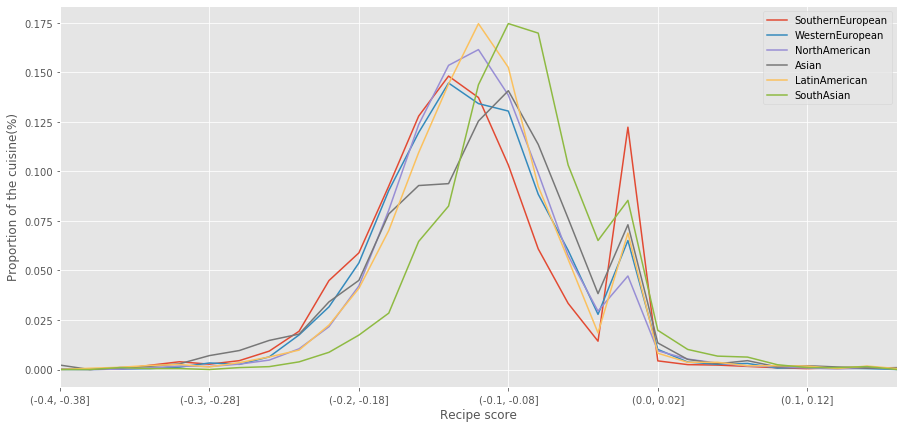

In [21]:
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))

nb_bins = 30
leg = []
for cuis in df_train.cuisine.unique()[:6]:
#cuis = "Asian"

    df = df_train[df_train["cuisine"]==cuis]
    bins = pd.cut(df['recipe_score'], [-0.4+x * 0.6/nb_bins for x in range(0, nb_bins)])
    data = df.groupby(bins).agg(['count'])[["recipe_score"]]
    data = data/data.sum()
    data.columns = data.columns.droplevel()
    data.plot(y="count",ax=ax)#,xticks=[-1+x * 2/nb_bins for x in range(0, nb_bins)]);
    leg.append(cuis)
    
ax.legend(leg)
ax.set_xlabel("Recipe score")
ax.set_ylabel("Proportion of the cuisine(%)")

Text(0, 0.5, 'Proportion of the cuisine(%)')

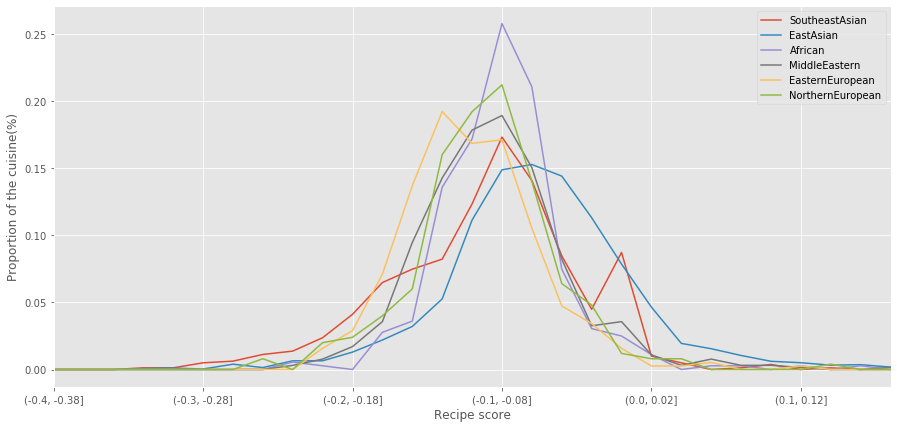

In [22]:
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))

nb_bins = 30
leg = []
for cuis in df_train.cuisine.unique()[6:]:
#cuis = "Asian"

    df = df_train[df_train["cuisine"]==cuis]
    bins = pd.cut(df['recipe_score'], [-0.4+x * 0.6/nb_bins for x in range(0, nb_bins)])
    data = df.groupby(bins).agg(['count'])[["recipe_score"]]
    data = data/data.sum()
    data.columns = data.columns.droplevel()
    data.plot(y="count",ax=ax)#,xticks=[-1+x * 2/nb_bins for x in range(0, nb_bins)]);
    leg.append(cuis)
    
ax.legend(leg)
ax.set_xlabel("Recipe score")
ax.set_ylabel("Proportion of the cuisine(%)")

In [24]:
df_train[(df_train["avg_compat"]==0) & (df_train["nb_ingrs"]==1)]

,cuisine,ingredients,all_ingredients,nb_ingrs,avg_compat,recipe_score
id,,,,,,
26340,NorthAmerican,[maple_syrup],maple_syrup,1,0.0,0.0
26363,NorthAmerican,[grain_wheat_flour],grain_wheat_flour,1,0.0,0.0
26540,NorthAmerican,[tomato],tomato,1,0.0,0.0
26542,NorthAmerican,[lime],lime,1,0.0,0.0
26920,NorthAmerican,[cayenne],cayenne,1,0.0,0.0
27096,NorthAmerican,[pumpkin],pumpkin,1,0.0,0.0
27293,LatinAmerican,[vegetable_oil],vegetable_oil,1,0.0,0.0
27484,SouthAsian,[yogurt],yogurt,1,0.0,0.0
27676,WesternEuropean,[quince],quince,1,0.0,0.0
